In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
from matplotlib.colors import ListedColormap

BASEDIR = "/data1/shahs3/users/sunge/cnv_simulator"

DATADIR = f"{BASEDIR}/data/ecdna_samples"
sample_name = "PM_0510"

In [5]:
def get_chr_bin_idxs(chr, chr_df, region_start, region_end):
    """
    Get the bins for a specific chromosome within a specified region.
    """
    bin_start = (math.floor(region_start / 500000) * 500000) - (500000 * 1)
    bin_end = (math.ceil(region_end / 500000) * 500000) + (500000 * 1)

    subset = chr_df[(chr_df["start"] >= bin_start) & (chr_df["start"] <= bin_end)]
    if subset.empty:
        raise ValueError(f"No bins found for chromosome {chr} in the specified range.")

    return subset

In [6]:
cn_df = pd.read_csv(f"{DATADIR}/{sample_name}.totalcn_per_cell.tsv", sep="\t")
cn_df

,chr,start,end,reads,copy,state,cell_id
0,1,1,500000,22,NaN,2,130115A-R13-C12
1,1,500001,1000000,128,NaN,2,130115A-R13-C12
2,1,1000001,1500000,192,1.898373,2,130115A-R13-C12
3,1,1500001,2000000,167,1.799708,2,130115A-R13-C12
4,1,2000001,2500000,149,1.480992,2,130115A-R13-C12
...,...,...,...,...,...,...,...
1930061,Y,57000001,57500000,0,NaN,0,130115A-R58-C19
1930062,Y,57500001,58000000,0,NaN,0,130115A-R58-C19
1930063,Y,58000001,58500000,0,NaN,0,130115A-R58-C19
1930064,Y,58500001,59000000,54,NaN,0,130115A-R58-C19


In [7]:
ecdna_df = pd.read_csv(f"{DATADIR}/ecdna.regions_042325.tsv", sep="\t")
ecdna_df = ecdna_df[ecdna_df["case"] == "PM_0510"]

ecdna_df

,case,marker,chr,start,end,assembly,len
6,PM_0510,TERT,5,1247245,23090100,GRCh37,21842855
7,PM_0510,EGFR,7,52134895,55952400,GRCh37,3817505
8,PM_0510,CDK4,12,58115746,58407545,GRCh37,291799


In [8]:
cn_df["bin_id"] = cn_df["chr"].astype(str) + "_" + cn_df["start"].astype(str) + "_" + cn_df["end"].astype(str)
cell_ids = cn_df["cell_id"].unique()
bin_ids = cn_df["bin_id"].unique()

# Looking at chr7 EGFR ecDNA region
chr7_df = cn_df[cn_df["chr"] == "7"]
print(chr7_df.head())
print(f"Min copy = {chr7_df['copy'].min()}, Max copy = {chr7_df['copy'].max()}")


     chr    start      end  reads      copy  state          cell_id  \
4881   7        1   500000    240       NaN      3  130115A-R13-C12   
4882   7   500001  1000000    253  2.679631      3  130115A-R13-C12   
4883   7  1000001  1500000    283  2.918062      3  130115A-R13-C12   
4884   7  1500001  2000000    240  2.504908      3  130115A-R13-C12   
4885   7  2000001  2500000    193  2.100834      3  130115A-R13-C12   

                 bin_id  
4881         7_1_500000  
4882   7_500001_1000000  
4883  7_1000001_1500000  
4884  7_1500001_2000000  
4885  7_2000001_2500000  
Min copy = 0.0605029619214976, Max copy = 477.821624878483


In [9]:
chr7_df["state"].describe()

count    99209.000000
mean         2.924523
std          0.532725
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         11.000000
Name: state, dtype: float64

In [10]:
chr7_ecdna_start = ecdna_df[ecdna_df["chr"] == 7]["start"]
chr7_ecdna_end = ecdna_df[ecdna_df["chr"] == 7]["end"]

chr7_ecdna_df = get_chr_bin_idxs(7, chr7_df, chr7_ecdna_start, chr7_ecdna_end)
print(chr7_ecdna_df.head())
print(chr7_ecdna_df.shape)

print(f"Min copy in ecdna region = {chr7_ecdna_df['copy'].min()}, Max copy in ecdna region = {chr7_ecdna_df['copy'].max()}")

     chr     start       end  reads       copy  state          cell_id  \
4984   7  51500001  52000000    144   1.996437      2  130115A-R13-C12   
4985   7  52000001  52500000   1640  23.967567      2  130115A-R13-C12   
4986   7  52500001  53000000   1872  28.868713      2  130115A-R13-C12   
4987   7  53000001  53500000   1830  27.835560      2  130115A-R13-C12   
4988   7  53500001  54000000   1884  29.565440      2  130115A-R13-C12   

                   bin_id  
4984  7_51500001_52000000  
4985  7_52000001_52500000  
4986  7_52500001_53000000  
4987  7_53000001_53500000  
4988  7_53500001_54000000  
(3110, 8)
Min copy in ecdna region = 0.395115297277201, Max copy in ecdna region = 477.821624878483


/tmp/ipykernel_1875059/2190217077.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bin_start = (math.floor(region_start / 500000) * 500000) - (500000 * 1)
/tmp/ipykernel_1875059/2190217077.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bin_end = (math.ceil(region_end / 500000) * 500000) + (500000 * 1)


<Figure size 1200x800 with 0 Axes>

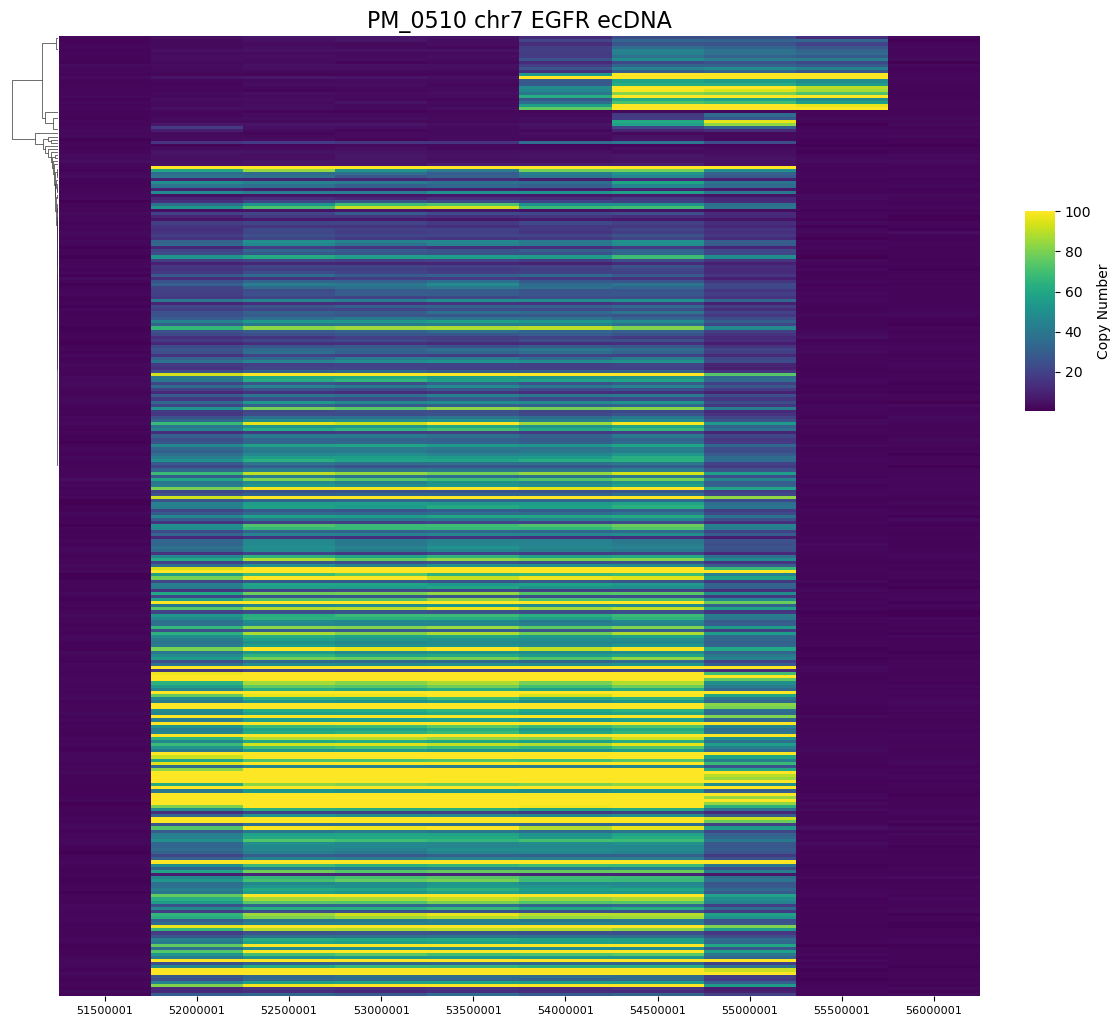

In [11]:
# Pivot to create heatmap data
chr7_bin_ids = chr7_ecdna_df["bin_id"].unique()
pivot_df = chr7_ecdna_df.pivot_table(index="cell_id", columns="bin_id", values="copy", fill_value=0)
pivot_df = pivot_df.reindex(index=cell_ids, columns=chr7_bin_ids, fill_value=0)

metric = "correlation"
method = "average"

xtick_labels = [x.split("_")[1] for x in chr7_bin_ids]

# Create heatmap
plt.figure(figsize=(12, 8))
ecdna_heatmap = sns.clustermap(pivot_df.values,
                               cmap = "viridis",
                               cbar_pos = (1.03, 0.6, 0.03, 0.2),
                               cbar_kws = {"label": "Copy Number"},
                               row_cluster = True,
                               col_cluster = False,
                               dendrogram_ratio = (0.05, 0.01),
                               xticklabels = False,
                               yticklabels = False,
                               vmax = 100,
                               metric = metric,
                               method = method
                               )

ecdna_heatmap.ax_heatmap.set_xticks([x + 0.5 for x in range(len(xtick_labels))])
ecdna_heatmap.ax_heatmap.set_xticklabels(xtick_labels, fontsize=8)

ecdna_heatmap.ax_heatmap.set_title(f"{sample_name} chr7 EGFR ecDNA", fontsize=16)

plt.savefig(f"{DATADIR}/{sample_name}_chr7_ecdna_heatmap_{metric}_{method}.png", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Separate into major ecDNA groups

from scipy.cluster.hierarchy import linkage, leaves_list
import plotly.express as px

Z = linkage(pivot_df.values, method = method, metric = metric)
row_order = leaves_list(Z)

ordered_data = pivot_df.values[row_order, :]
fig = px.imshow(ordered_data,
                width = 1200, height=800,
                color_continuous_scale='viridis',
                labels = {"color": "Copy Number"},
                y = None,
                aspect = 'auto',
                zmax = 100)
fig.show()

In [13]:
# medium_y = 23
# small_y = 24 ~ 38

medium_egfr_df = pivot_df.iloc[row_order[:24], :]
small_egfr_df = pivot_df.iloc[row_order[24:39], :]
large_egfr_df = pivot_df.iloc[row_order[39:], :]

medium_egfr_df.head()

bin_id,7_51500001_52000000,7_52000001_52500000,7_52500001_53000000,7_53000001_53500000,7_53500001_54000000,7_54000001_54500000,7_54500001_55000000,7_55000001_55500000,7_55500001_56000000,7_56000001_56500000
cell_id,,,,,,,,,,
130115A-R32-C23,2.683800,3.900512,5.734585,6.098257,5.237736,12.403458,23.669623,23.540290,13.137032,2.508887
130115A-R28-C21,1.253462,3.039884,4.671634,6.003376,3.767508,21.142569,33.213839,32.108468,33.212995,0.983503
130115A-R19-C48,2.104401,2.773249,3.303869,2.858845,3.634950,13.166073,26.660220,25.734791,19.852911,2.075013
130115A-R52-C14,2.497927,3.114432,3.743581,3.149622,2.570771,18.956849,35.101543,32.255233,26.939669,2.664586
130115A-R25-C12,1.748412,4.397009,4.751513,4.759834,4.720048,19.061015,44.502500,38.082083,31.299682,2.207090


<Figure size 1200x800 with 0 Axes>

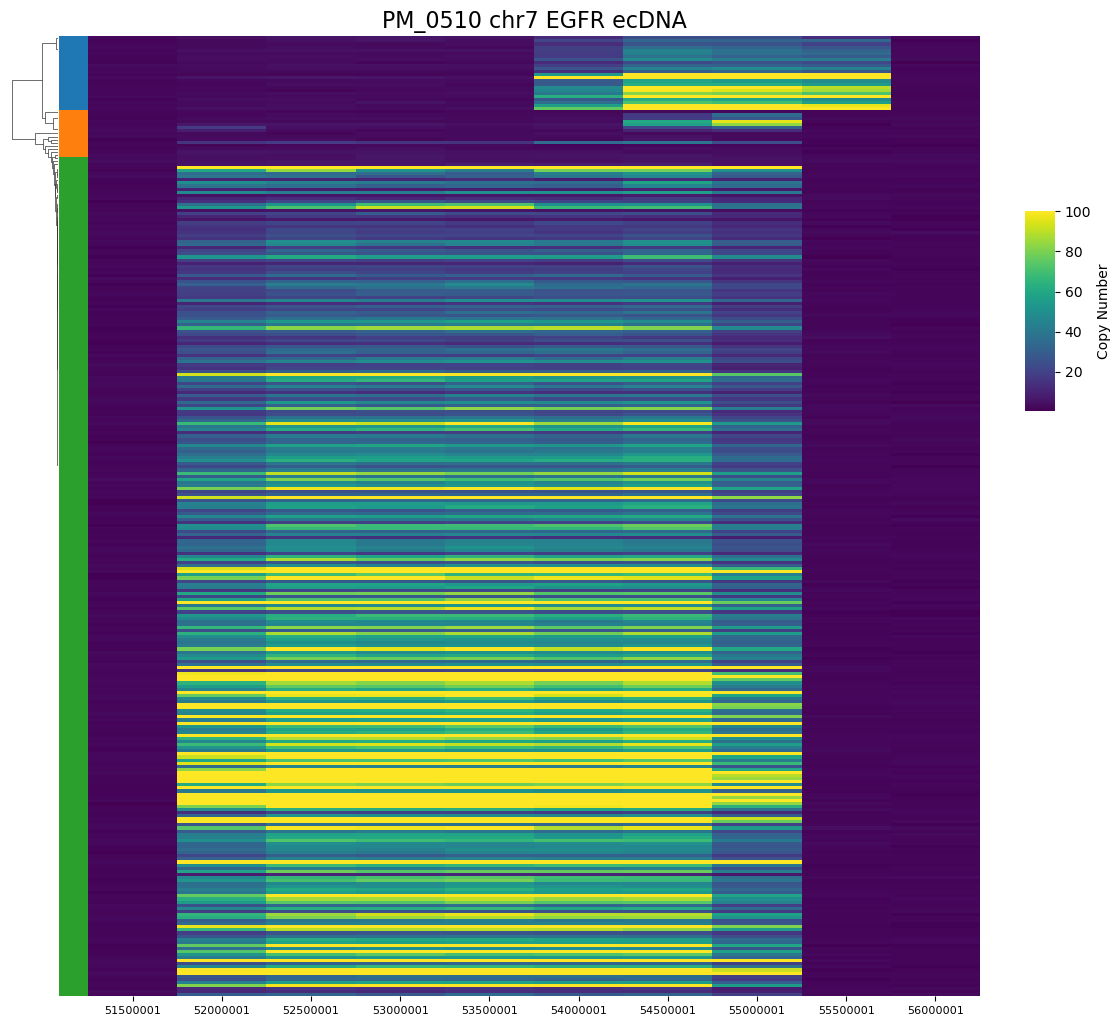

In [14]:
xtick_labels = [x.split("_")[1] for x in chr7_bin_ids]

row_colors = pd.Series(index = pivot_df.index, dtype = "object")
clustered_index = pivot_df.index[row_order]
row_colors.loc[clustered_index[:len(medium_egfr_df)]] = "tab:blue"
row_colors.loc[clustered_index[len(medium_egfr_df):len(medium_egfr_df) + len(small_egfr_df)]] = "tab:orange"
row_colors.loc[clustered_index[len(medium_egfr_df) + len(small_egfr_df):]] = "tab:green"

# Create heatmap
plt.figure(figsize=(12, 8))
ecdna_heatmap = sns.clustermap(pivot_df.values,
                               cmap = "viridis",
                               cbar_pos = (1.03, 0.6, 0.03, 0.2),
                               cbar_kws = {"label": "Copy Number"},
                               row_cluster = True,
                               col_cluster = False,
                               row_colors = row_colors.to_numpy(),
                               dendrogram_ratio = (0.05, 0.01),
                               xticklabels = False,
                               yticklabels = False,
                               vmax = 100,
                               metric = metric,
                               method = method
                               )

ecdna_heatmap.ax_heatmap.set_xticks([x + 0.5 for x in range(len(xtick_labels))])
ecdna_heatmap.ax_heatmap.set_xticklabels(xtick_labels, fontsize=8)

ecdna_heatmap.ax_heatmap.set_title(f"{sample_name} chr7 EGFR ecDNA", fontsize=16)

plt.savefig(f"{DATADIR}/{sample_name}_chr7_ecdna_heatmap_{metric}_{method}_splitcolor.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
Z_med = linkage(medium_egfr_df.values, method = "ward", metric = "euclidean")
row_order_med = leaves_list(Z_med)

ordered_data_med = medium_egfr_df.values[row_order_med, :]
fig = px.imshow(ordered_data_med,
                width = 900, height=500,
                color_continuous_scale='viridis',
                labels = {"color": "Read depth"},
                aspect = 'auto',
                zmax = 100)
fig.show()

bin_id  7_53000001_53500000  7_53500001_54000000  7_54000001_54500000  \
count             24.000000            24.000000            24.000000   
mean               3.601079             3.435193            34.385225   
std                1.197186             0.795017            23.317296   
min                1.806389             2.259518            12.303315   
25%                2.836983             2.919835            18.231796   
50%                3.250490             3.349970            26.792677   
75%                4.103739             3.900516            46.375559   
max                6.098257             5.237736           106.332515   

bin_id  7_54500001_55000000  
count             24.000000  
mean              71.431171  
std               51.473015  
min               22.549205  
25%               34.629617  
50%               53.073822  
75%               99.572811  
max              236.284715  
(24, 10)


Text(0, 0.5, 'Frequency')

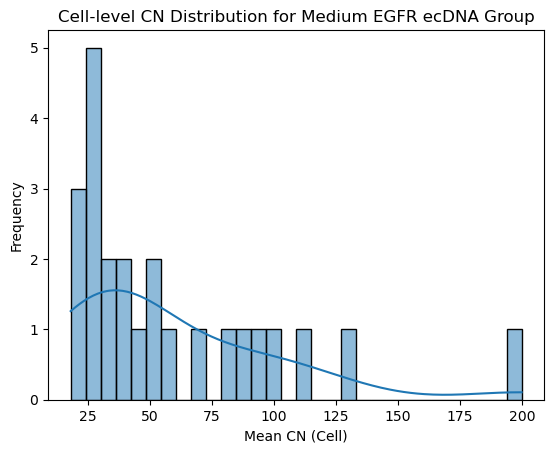

In [16]:
medium_egfr_df
# Get read depth distribution for medium ecDNA group in columns 3~6
print(medium_egfr_df.iloc[:, 3:7].describe())
print(medium_egfr_df.shape)
# Plot histogram of read depth for medium ecDNA group
medium_egfr_hist = np.histogram(medium_egfr_df.iloc[:, 5:9].values.flatten(), bins=30)
sns.histplot(medium_egfr_df.iloc[:, 5:9].values.mean(axis = 1), bins=30, kde=True)
plt.title("Cell-level CN Distribution for Medium EGFR ecDNA Group")
plt.xlabel("Mean CN (Cell)")
plt.ylabel("Frequency")


/tmp/ipykernel_1875059/3686770624.py:2: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



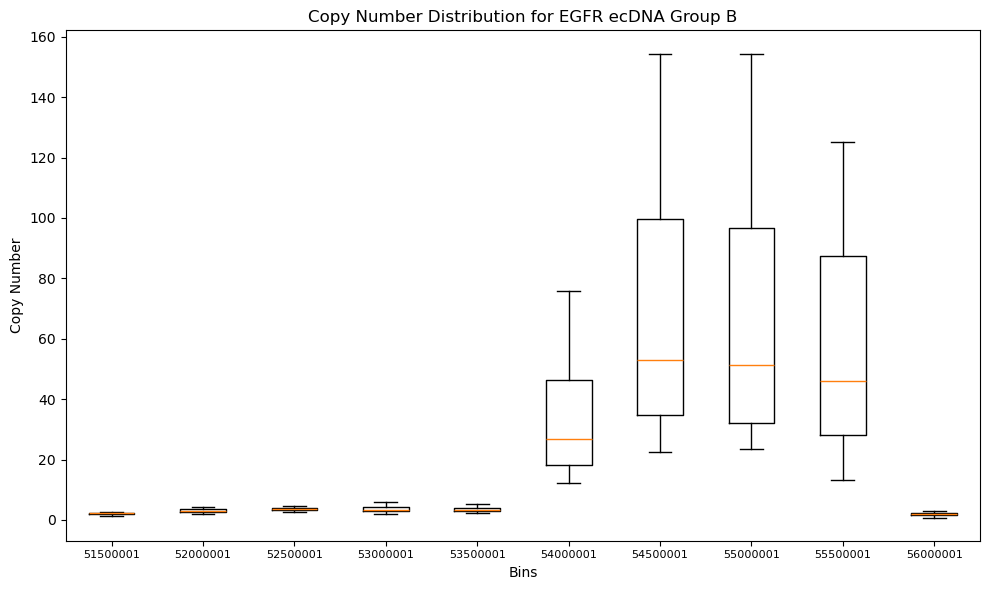

In [17]:
plt.figure(figsize = (10, 6))
plt.boxplot(medium_egfr_df.values, labels = medium_egfr_df.columns, showfliers = False)
plt.title("Copy Number Distribution for EGFR ecDNA Group B")
plt.xlabel("Bins")
plt.ylabel("Copy Number")
plt.xticks(ticks = range(1, len(xtick_labels) + 1), labels = xtick_labels, fontsize = 8)
plt.tight_layout()
plt.show()

In [18]:
Z_small = linkage(small_egfr_df.values, method = "ward", metric = "euclidean")
row_order_small = leaves_list(Z_small)

ordered_data_small = small_egfr_df.values[row_order_small, :]
fig = px.imshow(ordered_data_small,
                width = 900, height=500,
                color_continuous_scale='viridis',
                labels = {"color": "Read depth"},
                aspect = 'auto',
                zmax = 100)
fig.show()

bin_id  7_54500001_55000000  7_55000001_55500000
count              7.000000             7.000000
mean               7.663890            11.208403
std                6.746741            13.844424
min                2.240694             2.084163
25%                3.163943             3.076879
50%                4.131791             3.801600
75%               11.693833            15.878191
max               17.559196            34.662916
(15, 10)


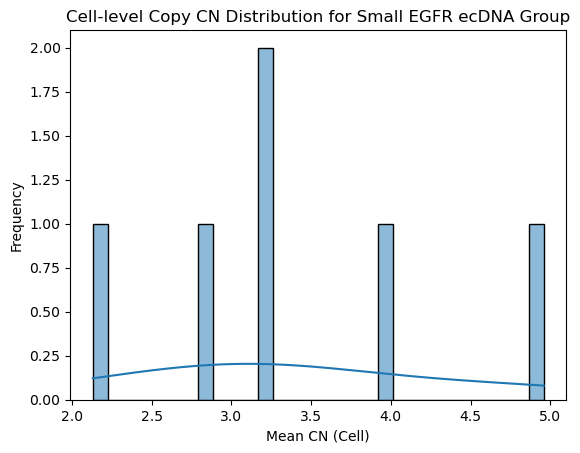

In [19]:
print(small_egfr_df.iloc[[0, 1, 2, 11, 12, 13, 14], 6:8].describe())
print(small_egfr_df.shape)
# Plot histogram of read depth for small ecDNA group
small_egfr_hist = np.histogram(small_egfr_df.iloc[:6, 4:6].values.mean(axis = 1), bins=30)
sns.histplot(small_egfr_df.iloc[:6, 4:6].values.mean(axis = 1), bins=30, kde=True)
plt.title("Cell-level Copy CN Distribution for Small EGFR ecDNA Group")
plt.xlabel("Mean CN (Cell)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_1875059/3661362601.py:2: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



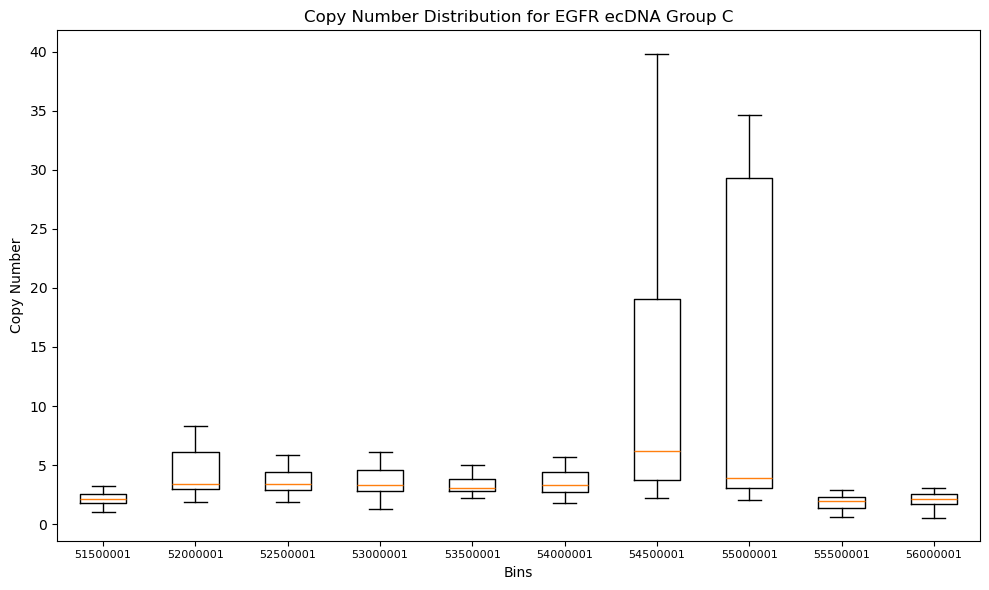

In [20]:
plt.figure(figsize = (10, 6))
plt.boxplot(small_egfr_df.values, labels = small_egfr_df.columns, showfliers = False)
plt.title("Copy Number Distribution for EGFR ecDNA Group C")
plt.xlabel("Bins")
plt.ylabel("Copy Number")
plt.xticks(ticks = range(1, len(xtick_labels) + 1), labels = xtick_labels, fontsize = 8)
plt.tight_layout()
plt.show()

In [21]:
Z_large = linkage(large_egfr_df.values, method = "ward", metric = "euclidean")
row_order_large = leaves_list(Z_large)
ordered_data_large = large_egfr_df.values[row_order_large, :]
fig = px.imshow(ordered_data_large,
                width = 900, height=800,
                color_continuous_scale='viridis',
                labels = {"color": "Read depth"},
                aspect = 'auto',
                zmax = 100)
fig.show()

bin_id  7_52000001_52500000  7_52500001_53000000  7_53000001_53500000  \
count            272.000000           272.000000           272.000000   
mean              49.787997            65.552742            64.279669   
std               45.987890            60.990412            59.248261   
min                4.450901             4.500571             5.468451   
25%               22.821768            29.698584            28.399784   
50%               38.268570            49.448720            47.761608   
75%               55.935836            74.152451            73.532249   
max              365.802903           477.821625           459.975603   

bin_id  7_53500001_54000000  7_54000001_54500000  7_54500001_55000000  \
count            272.000000           272.000000           272.000000   
mean              65.649070            62.807818            66.260061   
std               59.648093            57.668432            61.266296   
min                4.660358             4.180226  

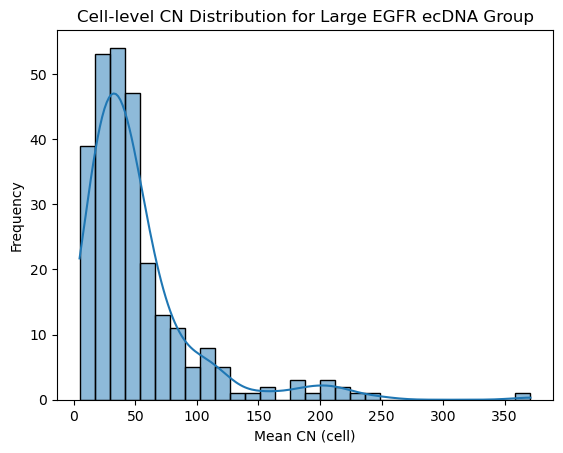

In [22]:
print(large_egfr_df.iloc[:, 1:8].describe())
print(large_egfr_df.shape)
# Plot histogram of read depth for large ecDNA group
large_egfr_hist = np.histogram(large_egfr_df.iloc[:, :6].values.mean(axis = 1), bins=30, density=True)
sns.histplot(large_egfr_df.iloc[:, :6].values.mean(axis = 1), bins=30, kde=True)
plt.title("Cell-level CN Distribution for Large EGFR ecDNA Group")
plt.xlabel("Mean CN (cell)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_1875059/736396761.py:2: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



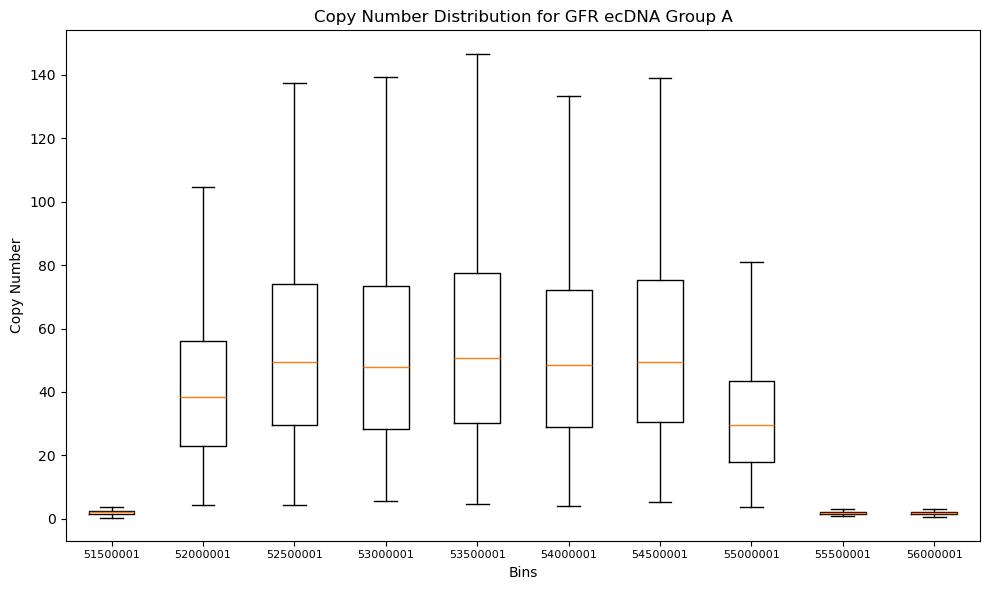

In [23]:
plt.figure(figsize = (10, 6))
plt.boxplot(large_egfr_df.values, labels = large_egfr_df.columns, showfliers = False)
plt.title("Copy Number Distribution for GFR ecDNA Group A")
plt.xlabel("Bins")
plt.ylabel("Copy Number")
plt.xticks(ticks = range(1, len(xtick_labels) + 1), labels = xtick_labels, fontsize = 8)
plt.tight_layout()
plt.show()


## Parameters for chr7 EGFR ecDNA profile

* Major clones
    * Group A (large) = 250 ~ 300 cells
        * 10 ~ 15 minor clones with different breakpoints
        * Starting breakpoint = 52000001 ~ 52500001
        * Ending breakpoint = 55000001 ~ 55500001
    * Group B (medium) = 20 ~ 25 cells
        * 3 ~ 5 minor clones with different breakpoints
        * Starting breakpoint = 54000001 ~ 54500001
        * Ending breakpoint = 55500001 ~ 56000001
    * Group C (small) = 5 ~ 10 cells
        * 2 minor clones with different breakpoints
        * Starting breakpoint = 54500001 ~ 55000001
        * Ending breakpoint = 55000001 ~ 55500001
    * Group D (none) = 5 ~ 10 cells

* Sub-region of chr7 from 51000001 ~ 56500001

In [65]:
# Assign cell counts per clone
major_clone_cell_ranges = [[250, 300], [20, 25], [5, 10], [5, 10]]
bp_clone_cell_ranges = [[10, 15], [3, 5], [2, 2], [1, 1]]
bp_ranges = [[52000001, 52500001, 55000001, 55500001],
             [54000001, 54500001, 55500001, 56000001],
             [54500001, 55000001, 55000001, 55500001],
             [51000001, 51000001, 56500001, 56500001]]
state_histograms = [large_egfr_hist, medium_egfr_hist, small_egfr_hist, None]

def get_bp_intervals(interval, length = 100000):
    start, end = interval
    if end - start < length:
        raise ValueError(f"Interval {interval} is too short for length {length}.")
    random_start = np.random.randint(start, end - length)
    random_end = random_start + length
    return [random_start, random_end]

def assign_cell_counts(major_clone_cell_ranges, bp_clone_cell_ranges, bp_ranges):
    clone_cell_counts = []
    clone_bp_ranges = []
    for i, (min_cells, max_cells) in enumerate(major_clone_cell_ranges):
        major_clone_cell_count = np.random.randint(min_cells, max_cells + 1)
        bp_clone_count = np.random.randint(bp_clone_cell_ranges[i][0], bp_clone_cell_ranges[i][1] + 1)
        # Split major clone_cell count in bp_clone_count groups
        if bp_clone_count > 1:
            probs = np.random.dirichlet(np.ones(bp_clone_count))
            bp_clone_cell_counts = np.random.multinomial(major_clone_cell_count, probs)
            major_clone_bp = []
            bp_start_range = get_bp_intervals(bp_ranges[i][:2])
            bp_end_range = get_bp_intervals(bp_ranges[i][2:])
            for j in range(bp_clone_count):
                bp_start = np.random.randint(bp_start_range[0], bp_start_range[1])
                bp_end = np.random.randint(bp_end_range[0], bp_end_range[1])
                major_clone_bp.append([bp_start, bp_end])
            bp_clone_cell_counts = bp_clone_cell_counts.tolist()
        else:
            bp_clone_cell_counts = [major_clone_cell_count]
            major_clone_bp = [[bp_ranges[i][0], bp_ranges[i][2]]]
        clone_cell_counts.append(bp_clone_cell_counts)
        clone_bp_ranges.append(major_clone_bp)
    return clone_cell_counts, clone_bp_ranges

def assign_cn(cn_histograms, clone_cell_counts):
    clone_cn = []
    for i, histogram in enumerate(cn_histograms):
        major_clone_cn = []
        if histogram == None:
            for minor_clone_cells in clone_cell_counts[i]:
                if minor_clone_cells == 0:
                    major_clone_cn.append([])
                else:
                    major_clone_cn.append([0] * minor_clone_cells) 
        else:
            counts = [x if x > 0 else 0.01 for x in histogram[0]]
            probabilities = counts / np.sum(counts)
            bin_edges = histogram[1]
            for minor_clone_cells in clone_cell_counts[i]:
                if minor_clone_cells == 0:
                    major_clone_cn.append([])
                else:
                    bin_indices = np.random.choice(len(probabilities), size = minor_clone_cells, p = probabilities)
                    sampled_bins = np.random.uniform(low = bin_edges[:-1][bin_indices], high = bin_edges[1:][bin_indices])
                    states = np.round(sampled_bins).astype(int)
                    major_clone_cn.append(states.tolist())
        clone_cn.append(major_clone_cn)
    return clone_cn

clone_cell_counts, clone_bp_ranges = assign_cell_counts(major_clone_cell_ranges, bp_clone_cell_ranges, bp_ranges)
clone_cn = assign_cn(state_histograms, clone_cell_counts)

metadata = {
    "sample_name": sample_name,
    "major_clone_cell_ranges": major_clone_cell_ranges,
    "bp_clone_cell_ranges": bp_clone_cell_ranges,
    "bp_ranges": bp_ranges,
    "clone_cell_counts": clone_cell_counts,
    "clone_bp_ranges": clone_bp_ranges,
    "clone_cn": clone_cn
}
print(metadata)

with open(f"{BASEDIR}/synthetic_bams_2/{sample_name}_EGFR_2/{sample_name}_EGFR_2_metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

{'sample_name': 'PM_0510', 'major_clone_cell_ranges': [[250, 300], [20, 25], [5, 10], [5, 10]], 'bp_clone_cell_ranges': [[10, 15], [3, 5], [2, 2], [1, 1]], 'bp_ranges': [[52000001, 52500001, 55000001, 55500001], [54000001, 54500001, 55500001, 56000001], [54500001, 55000001, 55000001, 55500001], [51000001, 51000001, 56500001, 56500001]], 'clone_cell_counts': [[6, 51, 23, 7, 38, 14, 15, 1, 8, 15, 5, 19, 13, 37], [9, 5, 4, 2], [0, 5], [7]], 'clone_bp_ranges': [[[52141380, 55313529], [52152180, 55346155], [52187807, 55308967], [52196123, 55405393], [52131117, 55345992], [52191533, 55313133], [52162466, 55381641], [52180083, 55323559], [52185425, 55361162], [52205741, 55347701], [52151568, 55383101], [52207303, 55338374], [52180367, 55357819], [52153971, 55393853]], [[54293644, 55822176], [54223039, 55878956], [54297722, 55878269], [54311688, 55856038]], [[54875964, 55385934], [54869823, 55360475]], [[51000001, 56500001]]], 'clone_cn': [[[255, 286, 10, 65, 320, 291], [164, 53, 330, 16, 29, 

In [66]:
print(metadata["clone_cn"])
print(len(metadata["clone_cn"]))
print(metadata["clone_cell_counts"])

print(clone_cn[3])

[[[255, 286, 10, 65, 320, 291], [164, 53, 330, 16, 29, 329, 74, 20, 64, 275, 86, 28, 11, 311, 300, 287, 7, 331, 280, 37, 325, 251, 20, 297, 338, 271, 342, 80, 31, 19, 168, 350, 24, 34, 39, 28, 34, 306, 24, 293, 280, 322, 314, 287, 29, 318, 320, 82, 28, 259, 36], [28, 39, 270, 341, 284, 51, 314, 319, 331, 56, 305, 322, 20, 31, 264, 340, 87, 289, 227, 42, 40, 165, 328], [47, 295, 329, 38, 19, 294, 43], [101, 41, 25, 41, 252, 308, 283, 302, 331, 263, 268, 22, 353, 34, 276, 75, 276, 19, 271, 65, 164, 341, 346, 185, 336, 339, 16, 261, 12, 89, 297, 313, 259, 320, 116, 38, 298, 32], [273, 29, 33, 36, 304, 26, 37, 277, 281, 341, 173, 323, 356, 206], [60, 354, 11, 14, 70, 325, 32, 27, 296, 262, 49, 169, 318, 48, 45], [319], [64, 23, 354, 314, 39, 33, 98, 168], [21, 73, 21, 48, 331, 83, 173, 286, 168, 10, 9, 345, 291, 60, 164], [49, 324, 29, 273, 258], [309, 343, 33, 341, 305, 46, 340, 37, 313, 175, 51, 58, 30, 349, 262, 56, 30, 7, 28], [338, 35, 22, 334, 260, 352, 9, 11, 252, 315, 263, 284, 317

In [72]:
def make_ecdna_cnv_profile(clone_cell_counts, clone_bp_ranges, clone_cn, chr, chr_start, chr_end):
    """
    Generate a CNV profile with 3 segments per clone: upstream (2), ecdna (copy_number), downstream (2).
    """
    cnv_profile = []
    clone_num = 0
    for i, clone_counts in enumerate(clone_cell_counts): # Major clones
        for j, cell_count in enumerate(clone_counts): # Minor clones
            if cell_count <= 0:
                continue
            bp_start, bp_end = clone_bp_ranges[i][j]
            
            for cell_idx in range(cell_count):
                # print(f"({i}, {j}), cell_count = {cell_count}, minor clone cn = {clone_cn[i][j]}, cell_idx = {cell_idx}")
                cn = clone_cn[i][j][cell_idx]
                # print(cn)

                segments = [
                    (chr_start, bp_start, 2),            # upstream
                    (bp_start, bp_end, cn),              # ecdna
                    (bp_end, chr_end, 2)                 # downstream
                ]
                for start, end, copy_number in segments:
                    cnv_profile.append({
                        "clone": clone_num,
                        "chr": chr,
                        "start": start,
                        "end": end,
                        "copy_number": copy_number,
                        "state": copy_number - 2,
                        "size": end - start,
                        "cell_count": 1
                    })
                clone_num += 1

    return pd.DataFrame(cnv_profile)

# Create CNV profile for chr7 EGFR ecDNA
chr7_EGFR_profile = make_ecdna_cnv_profile(clone_cell_counts,
                                           clone_bp_ranges,
                                           clone_cn,
                                           chr=7,
                                           chr_start=51000001,
                                           chr_end=56500001)

chr7_EGFR_profile.to_csv(f"{BASEDIR}/synthetic_bams_2/{sample_name}_EGFR_2/{sample_name}_EGFR_2_cnv_profile.tsv", sep="\t", index=False)

chr7_EGFR_profile

,clone,chr,start,end,copy_number,state,size,cell_count
0,0,7,51000001,52141380,2,0,1141379,1
1,0,7,52141380,55313529,255,253,3172149,1
2,0,7,55313529,56500001,2,0,1186472,1
3,1,7,51000001,52141380,2,0,1141379,1
4,1,7,52141380,55313529,286,284,3172149,1
...,...,...,...,...,...,...,...,...
847,282,7,51000001,56500001,0,-2,5500000,1
848,282,7,56500001,56500001,2,0,0,1
849,283,7,51000001,51000001,2,0,0,1
850,283,7,51000001,56500001,0,-2,5500000,1


/tmp/ipykernel_678024/2458435588.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



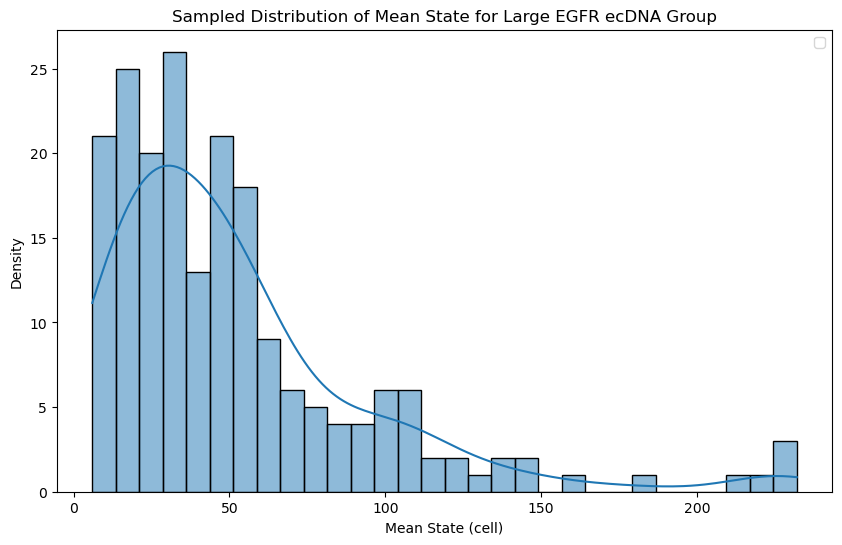

In [169]:
counts, bin_edges = np.histogram(large_egfr_df.iloc[:, 1:8].values.mean(axis = 1), bins=30)
probabilities = counts / counts.sum()

n_samples = 200
bin_indices = np.random.choice(len(probabilities), size = n_samples, p = probabilities)
sampled_bins = np.random.uniform(low = bin_edges[bin_indices], high = bin_edges[bin_indices + 1])
sampled_bins = np.round(sampled_bins).astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(sampled_bins, bins=30, kde = True)
plt.title("Sampled Distribution of Mean State for Large EGFR ecDNA Group")
plt.xlabel("Mean State (cell)")
plt.ylabel("Density")
plt.legend()
plt.show()

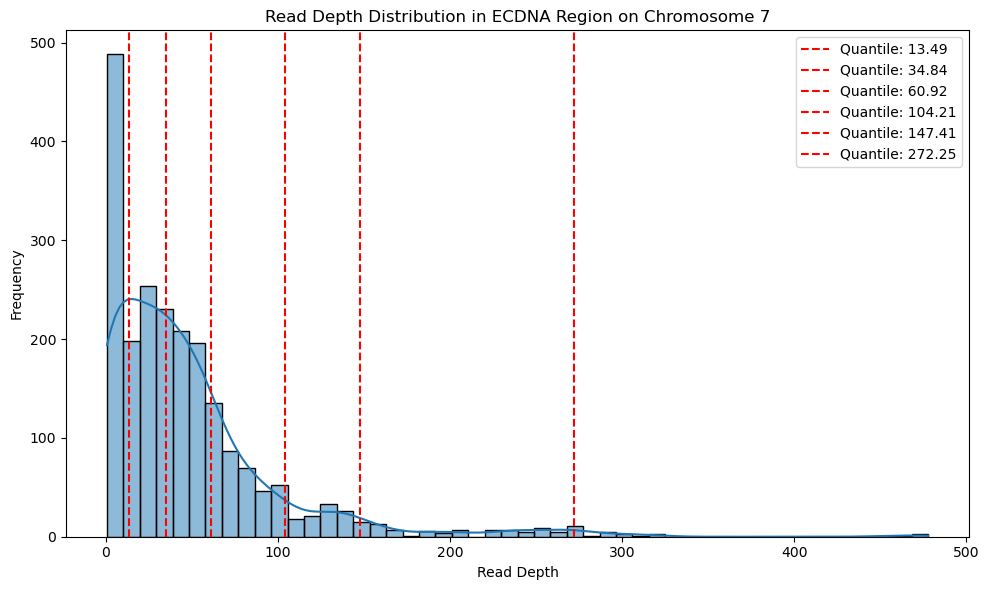

In [14]:
# Read depth distribution
plt.figure(figsize=(10, 6))
sns.histplot(chr7_ecdna_df["copy"], bins=50, kde=True)
plt.title("Read Depth Distribution in ECDNA Region on Chromosome 7")
plt.xlabel("Read Depth")
plt.ylabel("Frequency")
# Show quantiles
quantiles = chr7_ecdna_df["copy"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
for q in quantiles:
    plt.axvline(q, color='red', linestyle='--', label=f'Quantile: {q:.2f}')
plt.legend()
plt.tight_layout()

plt.show()